# NovelD

In [20]:
from model.modules.lnoveld import NovelD

m = NovelD(10, 5, 100)

In [22]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def train(model, batch_size, n_epochs):
    rewards = []
    losses = []
    for n_e in tqdm(range(n_epochs)):
        # Make predictions
        ep_rewards = []
        for b_i in range(batch_size):
            ep_rewards.append(model.get_reward(torch.rand(1, 17)))
        rewards.append(sum(ep_rewards))
        # Train
        losses.append(model.train_predictor())
    # Plot
    plt.plot(rewards)
    plt.plot(losses)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.03it/s]


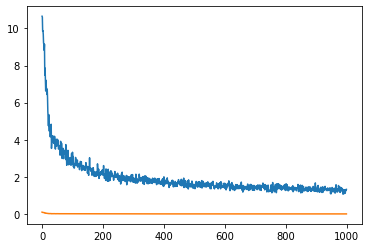

In [17]:
train(m, 32, 1000)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 721.98it/s]


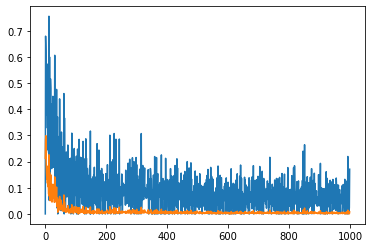

In [19]:
train(m, 1, 1000)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.76it/s]


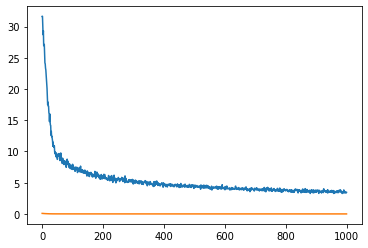

In [21]:
train(m, 100, 1000)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.67it/s]


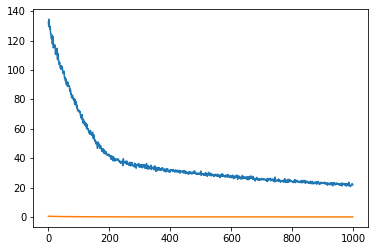

In [23]:
m = NovelD(17, 16, 64)
train(m, 100, 1000)

In [29]:
l = [np.random.rand(10), np.random.rand(10)]
l

[array([0.01332637, 0.86966362, 0.07826922, 0.75580822, 0.09602238,
        0.96651182, 0.04280373, 0.87886587, 0.90380471, 0.11783745]),
 array([0.33701291, 0.17958698, 0.37837657, 0.34447146, 0.28907411,
        0.57755394, 0.08705263, 0.64709855, 0.78802943, 0.27467977])]

In [30]:
np.concatenate(l)

array([0.01332637, 0.86966362, 0.07826922, 0.75580822, 0.09602238,
       0.96651182, 0.04280373, 0.87886587, 0.90380471, 0.11783745,
       0.33701291, 0.17958698, 0.37837657, 0.34447146, 0.28907411,
       0.57755394, 0.08705263, 0.64709855, 0.78802943, 0.27467977])

In [31]:
[1] * 2

[1, 1]

In [13]:
torch.seed()

4821780038691726644

In [40]:
a = torch.tensor([[-0.2554, -0.0441,  0.0087,  0.2480,  0.0232]])
b = torch.tensor([[ 0.0063,  0.1617, -0.4729,  0.3883, -0.0200]])
c = torch.cat((a, b))
torch.cat((c, a))

tensor([[-0.2554, -0.0441,  0.0087,  0.2480,  0.0232],
        [ 0.0063,  0.1617, -0.4729,  0.3883, -0.0200],
        [-0.2554, -0.0441,  0.0087,  0.2480,  0.0232]])

# LNovelD

In [17]:
from model.modules.lnoveld import LNovelD

m = LNovelD(2, 2, 5)

In [18]:
m

LNovelD(
  (obs_noveld): NovelD(
    (target): MLPNetwork(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=64, bias=True)
        (1): ReLU()
        (2): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): ReLU()
        )
        (3): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): ReLU()
        )
        (4): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): ReLU()
        )
        (5): Linear(in_features=64, out_features=5, bias=True)
      )
    )
    (predictor): MLPNetwork(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=64, bias=True)
        (1): ReLU()
        (2): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): ReLU()
        )
        (3): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): ReLU()
        )
    

In [5]:
obs = torch.Tensor([[10.0, 10.0]])
m(obs, None)


target tensor([[-1.8384,  0.9695, -3.8054, -2.1500,  3.6722]])
pred tensor([[ 2.2023, -4.3319, -0.7381, -3.4516,  0.7183]],
       grad_fn=<AddmmBackward0>)
nov tensor([8.0162])
last nov tensor([0.8016])
comp tensor([-3.2065])
7.615405559539795


7.615405559539795

In [6]:
m.obs_noveld.episode_states_count

{(1.0, 1.0): 1, (10.0, 10.0): 1}